# Bivariate Normal Distribution — From Scratch

**Dataset:** Brain MRI Radiomics-Style Numerical Dataset  
**Source:** [Kaggle](https://www.kaggle.com/datasets/aadigupta1601/brain-mri-radiomics-style-numerical-dataset)

We select two continuous features (`mean` and `energy`) from the dataset and:
1. Compute their sample statistics (μ₁, μ₂, σ₁, σ₂, ρ).
2. Implement the **Bivariate Normal PDF** from scratch (no statistical libraries).
3. Evaluate the PDF on every data point.
4. Visualise with a **contour plot** and a **3D surface plot**.

## 1. Load and Prepare Data

In [1]:
import csv
import math
import numpy as np                # only for meshgrid & linspace (numerical convenience)
import matplotlib.pyplot as plt

# ---------- Load CSV ----------
rows = []
with open("brain_mri_rich_features.csv") as f:
    reader = csv.DictReader(f)
    for row in reader:
        rows.append(row)

x = [float(r["mean"])   for r in rows]   # feature 1
y = [float(r["energy"]) for r in rows]   # feature 2
n = len(x)
print(f"Loaded {n} data points.")
print(f"x (mean)   — first 5: {x[:5]}")
print(f"y (energy) — first 5: {y[:5]}")

Loaded 7023 data points.
x (mean)   — first 5: [0.2028927672143076, 0.20423536113664215, 0.19681833304610905, 0.20635298186657475, 0.1922549378638174]
y (energy) — first 5: [0.06869743475979853, 0.044045421511905096, 0.05664845518782751, 0.03673354959189071, 0.045793607746848625]


## 2. Compute Sample Statistics From Scratch

We need five parameters for the BVN:  
$\mu_1, \mu_2$ (means), $\sigma_1, \sigma_2$ (standard deviations), and $\rho$ (correlation coefficient).

In [2]:
# ---- Helper functions (reused later) ----

def compute_mean(values):
    """Arithmetic mean."""
    return sum(values) / len(values)


def compute_std(values, mu):
    """Population standard deviation."""
    return math.sqrt(sum((v - mu) ** 2 for v in values) / len(values))


def compute_correlation(x, y, mu_x, mu_y, sigma_x, sigma_y):
    """Pearson correlation coefficient."""
    n = len(x)
    cov = sum((x[i] - mu_x) * (y[i] - mu_y) for i in range(n)) / n
    return cov / (sigma_x * sigma_y)


# ---- Compute statistics ----
mu_x    = compute_mean(x)
mu_y    = compute_mean(y)
sigma_x = compute_std(x, mu_x)
sigma_y = compute_std(y, mu_y)
rho     = compute_correlation(x, y, mu_x, mu_y, sigma_x, sigma_y)

print(f"μ_x  = {mu_x:.6f}")
print(f"μ_y  = {mu_y:.6f}")
print(f"σ_x  = {sigma_x:.6f}")
print(f"σ_y  = {sigma_y:.6f}")
print(f"ρ    = {rho:.6f}")

μ_x  = 0.186971
μ_y  = 0.198387
σ_x  = 0.070407
σ_y  = 0.122871
ρ    = -0.419372


## 3. Bivariate Normal PDF — Implemented From Scratch

The probability density function of the bivariate normal distribution is:

$$
f(x, y) = \frac{1}{2\pi\,\sigma_1\,\sigma_2\,\sqrt{1-\rho^2}}
\;\exp\!\left(
  -\frac{1}{2(1-\rho^2)}
  \left[
    \left(\frac{x-\mu_1}{\sigma_1}\right)^{2}
    - 2\rho\,\frac{(x-\mu_1)(y-\mu_2)}{\sigma_1\,\sigma_2}
    + \left(\frac{y-\mu_2}{\sigma_2}\right)^{2}
  \right]
\right)
$$

In [3]:
def bvn_pdf(x, y, mu1, mu2, s1, s2, rho):
    """
    Bivariate Normal PDF computed from scratch.
    Works for scalar or array-like inputs (via element-wise ops on NumPy arrays for the grid).
    """
    coeff = 1 / (2 * math.pi * s1 * s2 * math.sqrt(1 - rho ** 2))
    zx = (x - mu1) / s1
    zy = (y - mu2) / s2
    exponent = -1 / (2 * (1 - rho ** 2)) * (zx ** 2 - 2 * rho * zx * zy + zy ** 2)
    # math.exp only handles scalars; np.exp handles both scalars and arrays
    return coeff * np.exp(exponent)

## 4. Evaluate PDF on Every Data Point

In [4]:
pdf_values = [bvn_pdf(x[i], y[i], mu_x, mu_y, sigma_x, sigma_y, rho) for i in range(n)]

print("First 10 PDF values:")
for i in range(10):
    print(f"  Point ({x[i]:.4f}, {y[i]:.6f})  →  f = {pdf_values[i]:.6f}")

First 10 PDF values:
  Point (0.2029, 0.068697)  →  f = 11.284783
  Point (0.2042, 0.044045)  →  f = 8.774931
  Point (0.1968, 0.056648)  →  f = 9.697102
  Point (0.2064, 0.036734)  →  f = 8.142622
  Point (0.1923, 0.045794)  →  f = 8.307956
  Point (0.1876, 0.045902)  →  f = 8.005585
  Point (0.1932, 0.045487)  →  f = 8.338778
  Point (0.1769, 0.085545)  →  f = 11.225764
  Point (0.2293, 0.035752)  →  f = 8.428875
  Point (0.2362, 0.065003)  →  f = 10.845266


## 5. Build Visualisation Grid

In [5]:
# Create a mesh that spans ±3σ around each mean
grid_n = 200
x_grid = np.linspace(mu_x - 3 * sigma_x, mu_x + 3 * sigma_x, grid_n)
y_grid = np.linspace(mu_y - 3 * sigma_y, mu_y + 3 * sigma_y, grid_n)
X, Y   = np.meshgrid(x_grid, y_grid)

# Evaluate the BVN PDF over the entire grid (reusing the same function)
Z = bvn_pdf(X, Y, mu_x, mu_y, sigma_x, sigma_y, rho)
print(f"Grid shape: {Z.shape}")

Grid shape: (200, 200)


## 6. Contour Plot

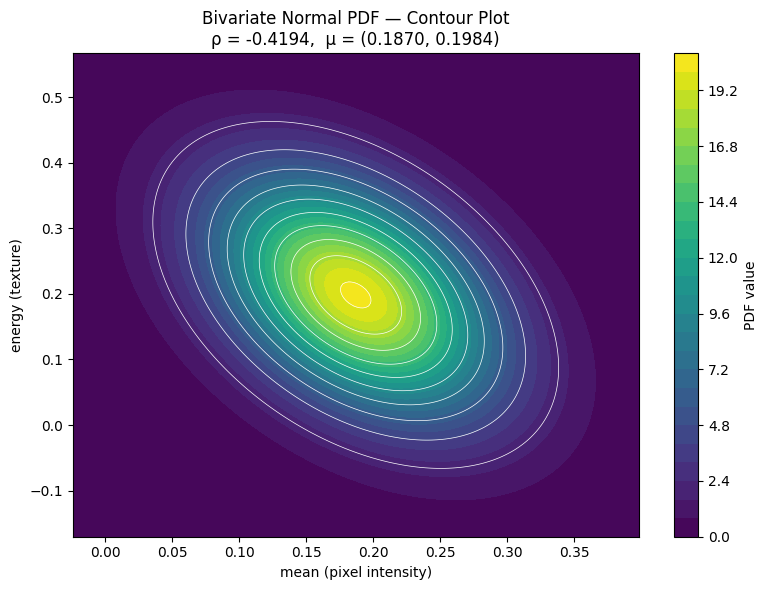

In [6]:
plt.figure(figsize=(8, 6))
cp = plt.contourf(X, Y, Z, levels=30, cmap="viridis")
plt.colorbar(cp, label="PDF value")
plt.contour(X, Y, Z, levels=10, colors="white", linewidths=0.5)
plt.xlabel("mean (pixel intensity)")
plt.ylabel("energy (texture)")
plt.title("Bivariate Normal PDF — Contour Plot\n"
          f"ρ = {rho:.4f},  μ = ({mu_x:.4f}, {mu_y:.4f})")
plt.tight_layout()
plt.show()

## 7. 3D Surface Plot

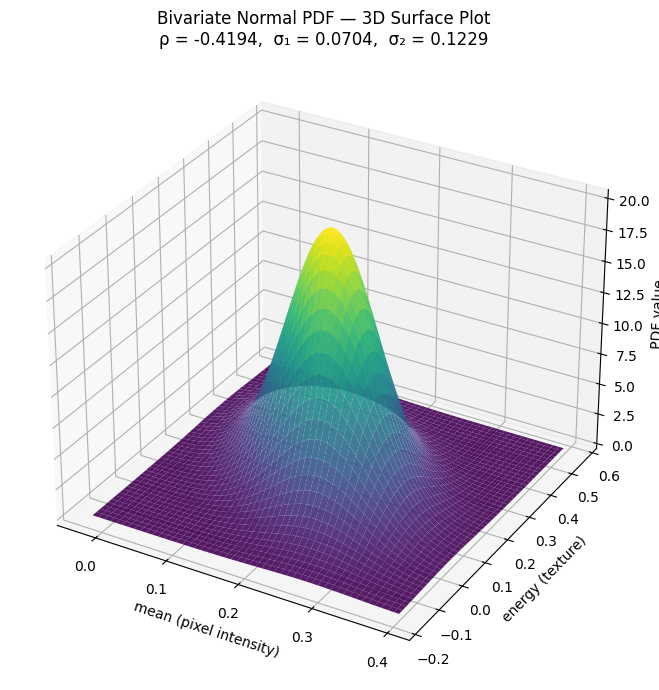

In [7]:
fig = plt.figure(figsize=(10, 7))
ax  = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z, cmap="viridis", edgecolor="none", alpha=0.9)
ax.set_xlabel("mean (pixel intensity)")
ax.set_ylabel("energy (texture)")
ax.set_zlabel("PDF value")
ax.set_title("Bivariate Normal PDF — 3D Surface Plot\n"
             f"ρ = {rho:.4f},  σ₁ = {sigma_x:.4f},  σ₂ = {sigma_y:.4f}")
plt.tight_layout()
plt.show()

## Interpretation

- The **elliptical contours** confirm the data follows a bivariate normal shape. The orientation and eccentricity of the ellipses are governed by the correlation coefficient **ρ** and the individual standard deviations **σ₁** and **σ₂**.
- A positive ρ tilts the ellipses along the diagonal, meaning higher `mean` pixel intensity tends to co-occur with higher `energy`.
- The 3D surface peaks at the joint mean **(μ₁, μ₂)** and decays symmetrically, weighted by the covariance structure of **Σ**.